# Max Becker

## Research question/interests

I am interested in the ideal size of a hockey player. Specifically what is the best size for scoring based off of the data present. It will be interesting to discover the ideal size for scoring and how size affects scoring. I am aiming to allow people to compare themselves to this analysis and see how they would do in the NHL based strictly on size alone.

### Step one of analysis Pipeline Loading data.

In [1]:
import pandas as pd
nhlData=pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep=";")
nhlData

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


## Task 1: Performing an EDA

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

I am using the info function to display all information that is present in my dataset including the datatype and count of different columns.

In [3]:
nhlData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   27319 non-null  object 
 1   Date_of_birth          27319 non-null  object 
 2   SEASON_year            27319 non-null  int64  
 3   SEASON                 27319 non-null  object 
 4   TEAM                   27319 non-null  object 
 5   Games_Played           27319 non-null  int64  
 6   Goals                  24802 non-null  float64
 7   Assists                24802 non-null  float64
 8   Points                 24802 non-null  float64
 9   PlusMinus_Ratings      24802 non-null  float64
 10  Penalty_Minutes        24802 non-null  float64
 11  Shots_on_Goal          24802 non-null  float64
 12  Shooting_Percentage    24802 non-null  float64
 13  PowerPlay_Goals        24802 non-null  float64
 14  PowerPlay_Assists      24802 non-null  float64
 15  Sh

In [4]:
nhlData.describe(include=["float64","int64"])

,SEASON_year,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,Penalty_Minutes,Shots_on_Goal,Shooting_Percentage,PowerPlay_Goals,...,Goals_Against_Average,Shots_Against,Saves,Save_Percentage,Shutouts,Height,Weight,Body_mass_index,Age,Experience
count,27319.000000,27319.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,27319.000000,27319.000000,27319.000000,27319.000000,27319.000000
mean,2003.060837,44.236246,7.752681,13.113297,20.865979,-0.094509,40.008669,76.981211,8.095117,2.034876,...,3.097958,777.134684,702.781486,0.893422,1.533174,185.343351,91.834181,26.717157,27.678136,6.567078
std,8.958513,28.161504,9.835740,14.395609,23.063433,10.255430,45.200093,71.567047,7.809799,3.521412,...,3.828691,622.315756,566.764797,0.063274,2.051259,5.262080,7.180618,1.461931,4.447828,4.511258
min,1976.000000,1.000000,0.000000,0.000000,0.000000,-61.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,50.000000,14.200000,19.000000,1.000000
25%,1996.000000,16.000000,1.000000,2.000000,3.000000,-5.000000,8.000000,17.000000,2.600000,0.000000,...,2.460000,202.000000,181.000000,0.885000,0.000000,183.000000,87.000000,25.800000,24.000000,3.000000
50%,2003.000000,47.000000,4.000000,8.000000,13.000000,-1.000000,27.000000,58.000000,7.400000,0.000000,...,2.860000,650.000000,581.000000,0.902000,1.000000,185.000000,91.000000,26.600000,27.000000,6.000000
75%,2010.000000,72.000000,11.000000,20.000000,32.000000,4.000000,54.000000,119.000000,12.000000,3.000000,...,3.390000,1251.000000,1133.000000,0.914000,2.000000,188.000000,97.000000,27.700000,31.000000,9.000000
max,2020.000000,84.000000,92.000000,163.000000,215.000000,98.000000,408.000000,528.000000,100.000000,31.000000,...,184.620000,2488.000000,2303.000000,1.000000,13.000000,206.000000,120.000000,31.400000,48.000000,28.000000


<br>
Using the describe function I can see the count, mean, max, standard deviation and other details that can help form ideas for further analysis. Since I am interested in the size of a player seeing that the average Body mass index of a player is equal to 26.7 and a standard deviation of 1.46 is very interesting.

I can also see that the seasons present in this data range from 1976 to 2020. I want to focus on more recent data so using this knowledge I will drop old data when it comes to my functions and cleaning.

In [5]:
nhlData[["Height","Weight","Goals","Body_mass_index"]].describe()

,Height,Weight,Goals,Body_mass_index
count,27319.000000,27319.000000,24802.000000,27319.000000
mean,185.343351,91.834181,7.752681,26.717157
std,5.262080,7.180618,9.835740,1.461931
min,163.000000,50.000000,0.000000,14.200000
25%,183.000000,87.000000,1.000000,25.800000
50%,185.000000,91.000000,4.000000,26.600000
75%,188.000000,97.000000,11.000000,27.700000
max,206.000000,120.000000,92.000000,31.400000


The dataframe above hightlights the aspects that I want to further analyze since I am interested in the ideal size of a player for scoring.

#### Below is a visualization of the distribution of Height in this dataset.

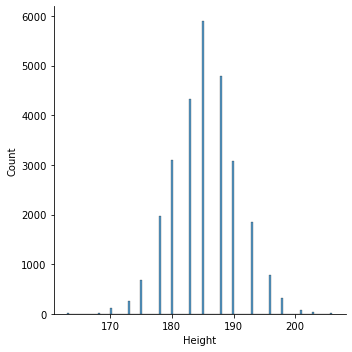

In [6]:
sns.displot(nhlData["Height"])

**Graph Analysis**

* Graph appears to be a normal distribution of height in the NHL. 
* Most common value is 185cm

#### Below is a visualization of the distribution of Weight in this dataset. 

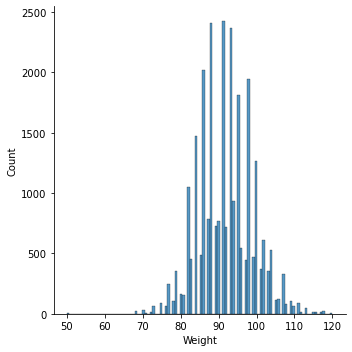

In [7]:
sns.displot(nhlData["Weight"])

**Graph Analysis**

* Graph appears to be a normal distribution of weight 
* Most common weights at values of around 87, 92, 94, 98

## Task 3: Using my Functions to perform analysis.

In [8]:
import project_functions1 as pf

My first function loads in a dataset and turns it into a pandas dataframe.

In [9]:
data = pf.unprocessed("../data/raw/NHL_Players_Statistics.csv")
data

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


My next function is used to load, clean, process, and wrangle data. It does this by first loading in the data from a csv file and turning it into a pandas dataframe. 

It then drops columns I do not want to focus on (columns not related to skater size and goal scoring success). 

As I mentioned earlier the raw data includes seasons all the way back to 1976, I want more recent data so I dropped any rows associated with Season Years less than 2000. 

To further clean my data I dropped any null values.

The NHL data has player names seperated as if the same person is multiple different players(duplicate values), I want to look at each player as a whole (based on their size) not necessarily what specific year the player played in. To focus more on the player and their specific attributes I used the groupby function and grouped players with identical height, weight, name and BMI, and summed their total goals, assists, games played, shots on goal and points. This wrangles and cleans the data significantly.

Overall his drops the row count from 27319 to 2430 which makes the data easier to process.

In [10]:
refined_data=pf.load_and_process("../data/raw/NHL_Players_Statistics.csv")
refined_data

,Name,Height,Weight,Body_mass_index,Games_Played,Goals,Assists,Shots_on_Goal,Points
0,Aaron Downey,185,98,28.6,243,8.0,10.0,85.0,18.0
1,Aaron Gagnon,180,85,26.2,38,3.0,2.0,28.0,5.0
2,Aaron Gavey,188,86,24.3,197,23.0,32.0,224.0,55.0
3,Aaron MacKenzie,183,88,26.3,5,0.0,0.0,3.0,0.0
4,Aaron Miller,190,94,26.0,475,13.0,64.0,353.0,77.0
...,...,...,...,...,...,...,...,...,...
2425,Zdeno Chara,206,113,26.6,1469,203.0,444.0,3205.0,647.0
2426,Zdeno Ciger,185,91,26.6,56,12.0,13.0,92.0,25.0
2427,Zenith Komarniski,183,91,27.2,21,1.0,1.0,22.0,2.0
2428,Zenon Konopka,183,97,29.0,346,12.0,18.0,200.0,30.0


The main aspects I am interested in are goals, height, weight and body mass index. So an initial analysis is done below.

In [11]:
refined_data[["Height","Weight","Body_mass_index","Goals"]].describe()

,Height,Weight,Body_mass_index,Goals
count,2430.000000,2430.000000,2430.000000,2430.000000
mean,185.600823,92.290947,26.779136,45.774486
std,5.266578,6.924735,1.391060,77.060050
min,163.000000,50.000000,14.200000,0.000000
25%,183.000000,88.000000,25.800000,1.000000
50%,185.000000,92.000000,26.800000,11.000000
75%,188.000000,97.000000,27.700000,54.000000
max,206.000000,120.000000,31.400000,706.000000


**Initial Analysis**

The average height of all players in this dataframe is: **185.6cm**.

The average weight of all players in this dataframe is: **92.3 kg**.

The average Body mass index for all players in this dataframe is: **26.8**.

The average Goals scored for all players in this dataframe is: **45.8**.

## Analysis

To begin to find correlations I created a correlation matrix heatmap to identify basic correlations between values

#### Making a correlation matrix/ Heatmap to find general correlations between columns.

<AxesSubplot:>

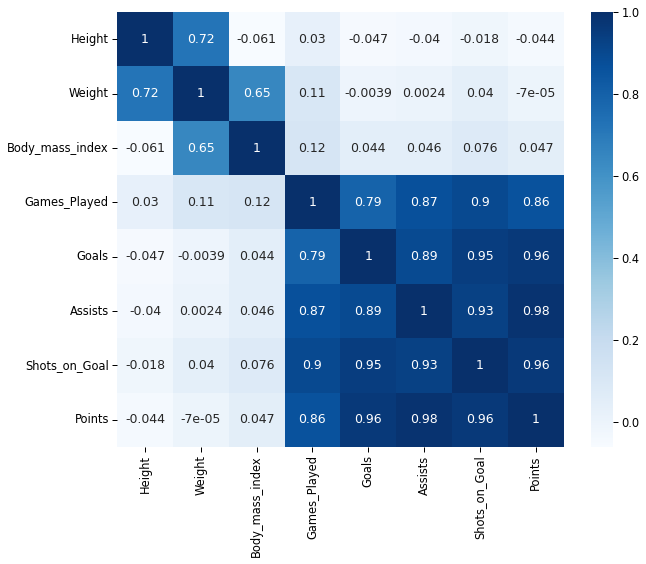

In [12]:
plt.figure(figsize=(10, 8))
sns.set_context("paper", font_scale=1.3)

sns.heatmap(refined_data.corr(), annot=True, cmap="Blues")

**Graph Analysis**

There is a **small negative correlation** between goals scored and height also a **small negative correlation** between goals scored and weight. Using this initial analysis I will further pursue the idea that a larger player (increased height and increased weight) leads to a decrease in goals scored.

#### Linear regression plot of Height and Goals among all players 

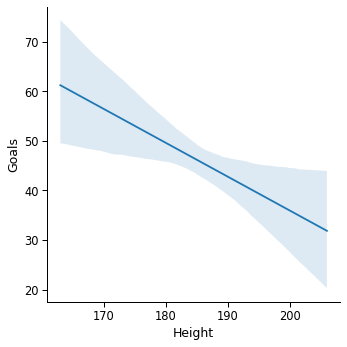

In [13]:
sns.lmplot(x="Height", y="Goals", data=refined_data, scatter=False)

**Graph Analysis**

* Graph appears to have a **negative regression** as height increases.
* This implies that an increase in height will lead to a decrease in goals scored (negative relationship).

#### Linear regression plot of Weight and Goals among all players

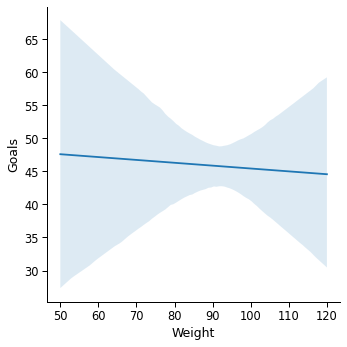

In [24]:
sns.lmplot(x="Weight", y="Goals", data=refined_data, scatter=False)

**Graph Analysis** 

* Graph appears to have a slightly **negative linear regression** leading me to believe that as weight increases, goals scored decreases (negative relationship).

#### Linear regression plot of BMI and Goals among all players

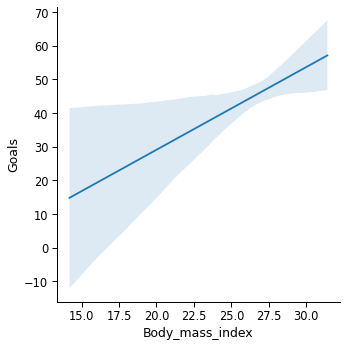

In [25]:
sns.lmplot(x="Body_mass_index", y="Goals", data=refined_data, scatter=False)

**Graph Analysis**

* The regression line between Body Mass Index and goals scored appears **positive**.

#### To further highlight the top scorers and their related size, I created a new dataframe with the top scorers (must have scored more than 300 goals) to more successfully determine the ideal height and weight for goal scoring. This is also done to test the initial findings that a decrease in height and weight increases goal scoring.

In [16]:
topPlayerdf=pf.topScorers("../data/raw/NHL_Players_Statistics.csv")
topPlayerdf

,Name,Height,Weight,Body_mass_index,Games_Played,Goals,Assists,Shots_on_Goal,Points,Succesful Players
0,Alex Ovechkin,190,108,29.9,1152,706.0,572.0,5545.0,1278.0,True
1,Anze Kopitar,190,102,28.2,1073,333.0,617.0,2600.0,950.0,True
2,Corey Perry,190,95,26.3,1045,377.0,420.0,2947.0,797.0,True
3,Daniel Alfredsson,180,92,28.4,975,366.0,581.0,2700.0,947.0,True
4,Daniel Sedin,185,85,24.8,1306,393.0,648.0,3474.0,1041.0,True
5,Dany Heatley,193,100,26.9,869,372.0,419.0,2565.0,791.0,True
6,Eric Staal,193,93,25.0,1240,436.0,585.0,3853.0,1021.0,True
7,Evgeni Malkin,190,88,24.4,907,416.0,660.0,3045.0,1076.0,True
8,Henrik Zetterberg,183,89,26.6,1082,337.0,623.0,3455.0,960.0,True
9,Ilya Kovalchuk,190,104,28.8,926,443.0,433.0,3223.0,876.0,True


In [17]:
topPlayerdf[["Height","Weight","Body_mass_index","Goals"]].describe()

,Height,Weight,Body_mass_index,Goals
count,40.000000,40.000000,40.000000,40.000000
mean,186.225000,93.250000,26.875000,396.225000
std,4.768957,6.577935,1.342548,75.459443
min,173.000000,80.000000,24.400000,312.000000
25%,183.000000,88.000000,25.775000,350.250000
50%,185.000000,93.000000,26.900000,378.500000
75%,190.000000,98.000000,27.725000,417.250000
max,193.000000,108.000000,29.900000,706.000000


#### This new dataframe **counters** the initial findings and actually has a higher average weight and higher average height than the previous data. This implies that an increase in weight and height increases goal scoring. Using these new findings we can argue that as height and weight increase, more goals will be scored.

Average Height among all players: **185.6cm**
         
Average Height among top scorers: **186.2cm**

Average Weight among all players: **92.3kg**

Average Height among top scorers: **93.3kg**

Average Body mass index among all players: **26.8**

Average Body mass index among top scorers: **26.9**

Average Goals scored among all players: **45.8**

Average Goals scored among top players: **396.2**

### Linear regression plot of Weight vs Goals among top scorers

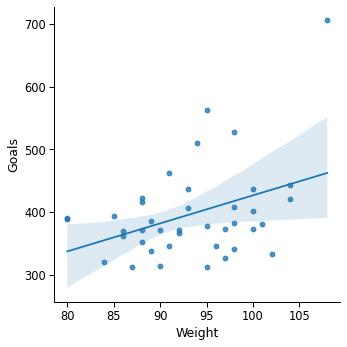

In [18]:
sns.lmplot(x="Weight", y="Goals", data=topPlayerdf)

**Graph Analysis**

* This linear regression shows a general trend that among top scorers, an **increase** in Weight **increases** goals scored. 
* This highlights a **positive relationship** between weight and goals scored among top players.

### Linear regression plot of Height vs Goals among top scorers

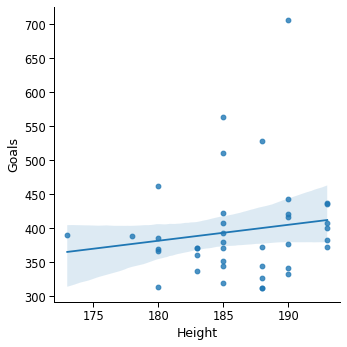

In [19]:
sns.lmplot(x="Height", y="Goals", data=topPlayerdf)

**Graph Analysis**

* This linear regression shows a smaller but still general trend that among top scorers as height **increases**, goal scoring also **increases**.
* Therefore a **positive relationship** exists between height and goals scored among top players.

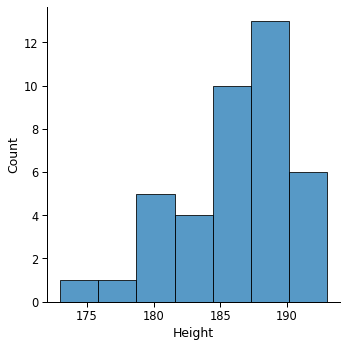

In [20]:
sns.displot(data=topPlayerdf,x="Height")

**Graph Analysis**

* This distribution plot shows the most common heights among the top scorers which appears to be between 185-190cm.
* A height of 185-187cm has a count of 10 whereas a height of 187-190cm has a count of 13.

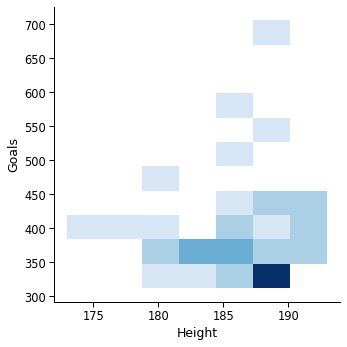

In [21]:
sns.displot(data=topPlayerdf,x="Height",y="Goals",cmap="Blues")

**Graph Analysis**

This distribution plot shows the density of heights in relation to goals.
* As goals increase we see a general trend of an increase in height, this further shows the **positive relationship** they have. 
* The most dense value is between 187-190cm at a goal range of 300-350.
* The most goals scored (675-700) is associated with a height between 188-190.5cm.

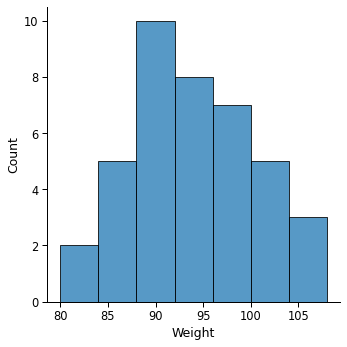

In [22]:
sns.displot(data=topPlayerdf,x="Weight")

**Graph Analysis**

* This distribution plot shows the most common weight among top scorers which appears to be 90kg.
* The most common weight of 90kg has a count of 10, followed by a weight 93-95kg with a count of 8.

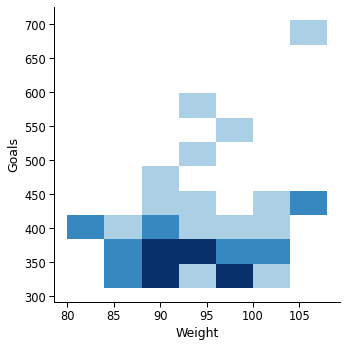

In [23]:
sns.displot(data=topPlayerdf,x="Weight",y="Goals",cmap="Blues")

**Graph Analysis**

This distribution plot shows the density of weights compared to goals among top players. 
* We find that as total goals increases, weight also increases, further showcasing the **positive relationship** between weight and goals among top players.
* The most dense areas are at weights of 90kg at a range of 300-375 goals scored.
* The most goals scored(675-700) is associated with a weight of 105-108kg.

### Written Analysis

In conclusion, provided through the data and plots of the top scorers in the NHL in the past 20 years, we see a general trend that an increase in weight and height leads to an increase in goals scored among top players. Additonally the average height of a top scorer in the NHL is around 186.2cm, but due to our observations it appears that a height of 187-190cm leads to more goals scored among the top players, thus a positive relationship between height and goals scored was observed. Additionally, we observed the average weight of a top scorer in the NHL to be around 93.3kg, but due to our observations it appears that a weight of 94-105kg leads to more goals scored among top players, thus a positive relationship between weight and goals scored was observed.

Initial observations among all players found a negative relationship between height and goals scored, along with a negative relationship between weight and goals scored. This was the opposite case for the relationships between height and goals scored and weight and goals scored among top players. 

Therefore we can conclude that in the NHL to be a top scorer strictly based on size, the ideal height would be around 186-190cm and the closer to 190cm the more successful. The ideal weight would be around 93.3kg-105kg and the closer to 105kg the more successful.

There are a few obvious possible reasons for these counter relationships.
* When analyzing the vast player base we see a negative relationship (correlation) between goals scored and increases in size. This is very likely due to the position vs goals scored realtionship. Usually, defencemen are larger than forwards and also produce less goals than forwards. Therefore when analyzing the entire player base, as player size increases, more defencemen are taken into account and goal scoring decreases.
* However, when analyzing top player data we observe a positive relationship (correlation) between goals scored and increases in size. This makes more sense as defencemen are not among the top scorers, so as size increases, no additional defencemen are taken into account which would in turn decrease goals scored.